In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [12]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [13]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 250, 
    mutation_rate = 0.05,
    max_tree_depth = 3,
)

In [14]:
dataset = pd.read_csv("csv/adm_data.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
tester = tester(X, y, generator, 8, 1, 400, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  249 Best fitness:  0.6282860750774882 Generation best 0.6130562889832778
Split:  0 Feature:  1
Iteration:  249 Best fitness:  0.6259135958366816 Generation best 0.6130562889832778
Split:  0 Feature:  2
Iteration:  249 Best fitness:  0.6262197221903341 Generation best 0.6130562889832778
Split:  0 Feature:  3
Iteration:  249 Best fitness:  0.6269850380744653 Generation best 0.6259135958366816
Split:  0 Feature:  4
Iteration:  249 Best fitness:  0.6317299965560785 Generation best 0.6130562889832778
Split:  0 Feature:  5
Iteration:  249 Best fitness:  0.6314238702024261 Generation best 0.6102246202119925
Split:  0 Feature:  6
Iteration:  249 Best fitness:  0.6269850380744653 Generation best 0.6102246202119925
Split:  0 Feature:  7
Iteration:  249 Best fitness:  0.6259135958366816 Generation best 0.5878773963953622


In [16]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

3
3
3
3
3
3
3
3


In [17]:
tester.test_models(notests=30)

Iteration 4 - MSE 0.004356873018554817, R2 0.8251234553674534, MAE 0.04619592010607041, NEW_MSE 0.004400102106415919, NEW_R2 0.8233883225140122, NEW_MAE 0.04597333795240209
Iteration 9 - MSE 0.004491611789420127, R2 0.819715298972577, MAE 0.046904342259360035, NEW_MSE 0.004269010883579215, NEW_R2 0.8286500733118222, NEW_MAE 0.046062513111077674
Iteration 14 - MSE 0.0043039655262597, R2 0.8272470608520154, MAE 0.04574168027933812, NEW_MSE 0.004273800378106189, NEW_R2 0.8284578321678076, NEW_MAE 0.045817581145350346
Iteration 19 - MSE 0.004295140601752753, R2 0.8276012764322827, MAE 0.04508019193999699, NEW_MSE 0.004424091168591088, NEW_R2 0.8224254474693866, NEW_MAE 0.046295656303984384
Iteration 24 - MSE 0.004255744251804022, R2 0.829182570521146, MAE 0.045695005399138997, NEW_MSE 0.004417627557327146, NEW_R2 0.8226848844552415, NEW_MAE 0.046162876892785594
Iteration 29 - MSE 0.004249080529289722, R2 0.8294500395896104, MAE 0.04594731811021634, NEW_MSE 0.004129996996074469, NEW_R2 0.83

In [18]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,0.004373,0.824462,0.046376,0.004323,0.826468,0.045742
1,SGDRegressor,0.004468,0.820644,0.046440,0.004381,0.824160,0.046765
2,GradientBoostingRegressor,0.006944,0.721282,0.053167,0.006086,0.755731,0.052571


In [19]:
print(tester.get_tests().T.to_latex(index=False))  

\begin{tabular}{lll}
\toprule
                    0 &            1 &                         2 \\
\midrule
RandomForestRegressor & SGDRegressor & GradientBoostingRegressor \\
             0.004373 &     0.004468 &                  0.006944 \\
             0.824462 &     0.820644 &                  0.721282 \\
             0.046376 &      0.04644 &                  0.053167 \\
             0.004323 &     0.004381 &                  0.006086 \\
             0.826468 &      0.82416 &                  0.755731 \\
             0.045742 &     0.046765 &                  0.052571 \\
\bottomrule
\end{tabular}



C:\Users\David Arcos\AppData\Local\Temp\ipykernel_19240\2462179699.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tester.get_tests().T.to_latex(index=False))


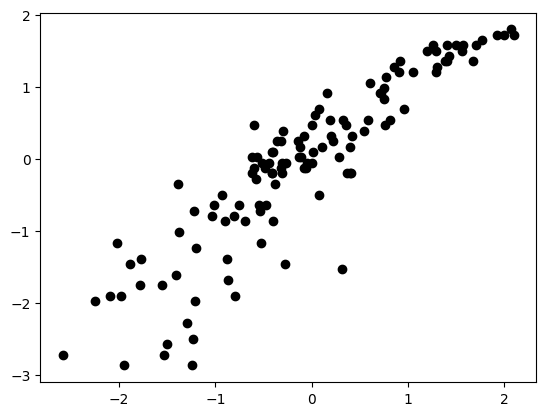

Min:  -2.584963523515199 Max:  2.0975956899784176 Mean:  -0.08382675404895239 Std:  1.0466500977203845


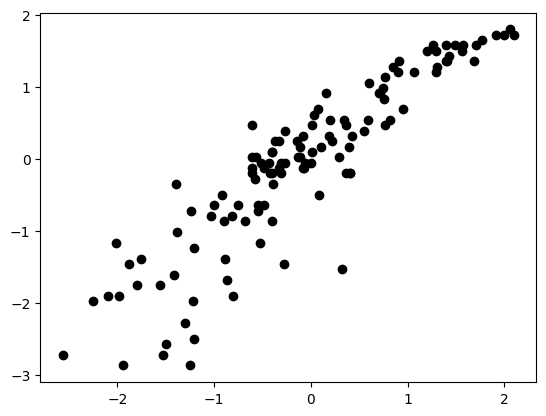

Min:  -2.56594111120545 Max:  2.097317672666654 Mean:  -0.08364714381680374 Std:  1.0460935778871148


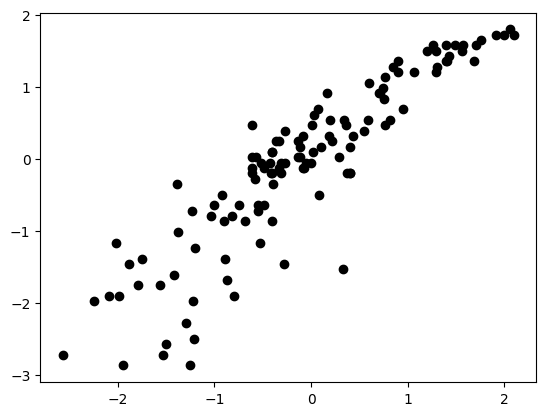

Min:  -2.569460131532745 Max:  2.097451396589057 Mean:  -0.08371545543512217 Std:  1.0461199026620653


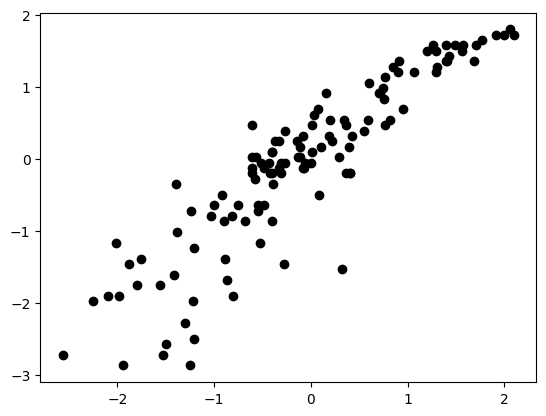

Min:  -2.565941111205445 Max:  2.097317672666657 Mean:  -0.08364714381679873 Std:  1.0460935778871143


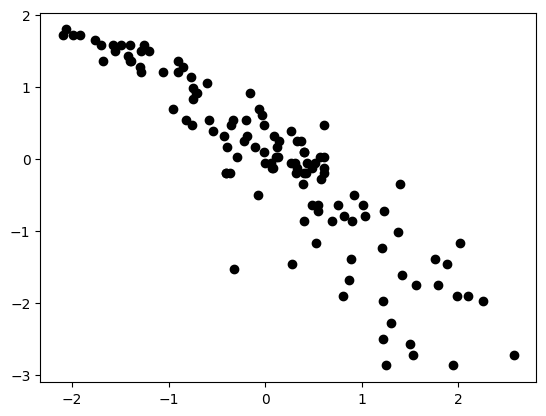

Min:  -2.09748084974778 Max:  2.5719402376933997 Mean:  0.08373346059850088 Std:  1.046204413089221


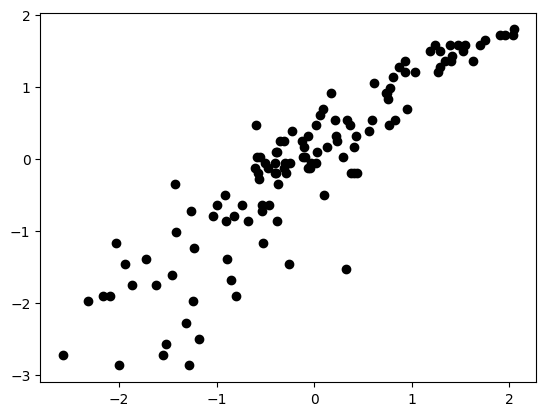

Min:  -2.5768522184926286 Max:  2.0450994436443484 Mean:  -0.0842806109807898 Std:  1.0507931554030003


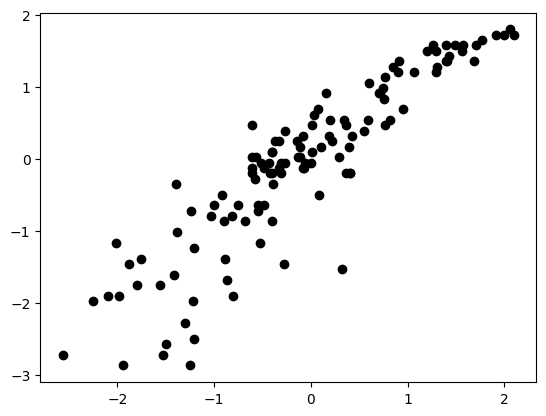

Min:  -2.5659411115430637 Max:  2.097317672177761 Mean:  -0.08364714383463855 Std:  1.0460935779099294


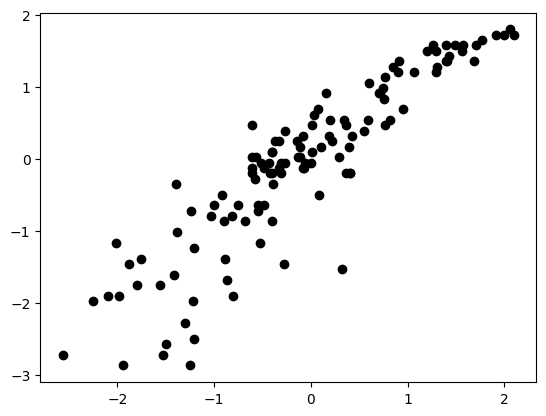

Min:  -2.56594111120545 Max:  2.097317672666654 Mean:  -0.08364714381680374 Std:  1.0460935778871148


In [20]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std()) 